# ***Data Science & HPC 3rd Project***

## ***Initializing and Importing Packages***

In [63]:
using Plots, DataFrames, StatsBase, Plots.PlotMeasures, LaTeXStrings, CSV, GLM, Flux
include("Mods.jl")
theme(:dark)
Plots.default(titlefontsize=12, tickfontsize=10, labelfontsize=12, legendfontsize=9,
    fontfamily="Computer Modern", frame=:box, label=nothing)

## ***Problem 1:***

In [67]:
SDF = CSV.read("Salary_Data.csv", DataFrame);    #=Salary DataFrame=#
#Normalizing Data:
# SDF.NormalizedYearsExperience = NormalizeFunc(SDF.YearsExperience);
# SDF.NormalizedSalary = NormalizeFunc(SDF.Salary);
#Using GLM ML functions to calculate Least Squares
OLS = lm(@formula(Salary ~ YearsExperience), SDF);
#Solving coefficient matrix
a, b = UsedFuncs.FitLine(SDF[!, 1], SDF[!, 2]);
LY = (a * SDF[!, 1]) .+ b;
#No difference between OLS and LY

L"$\Large \theta_1 = 9449.962,\quad \theta_0 = 25792.2$"

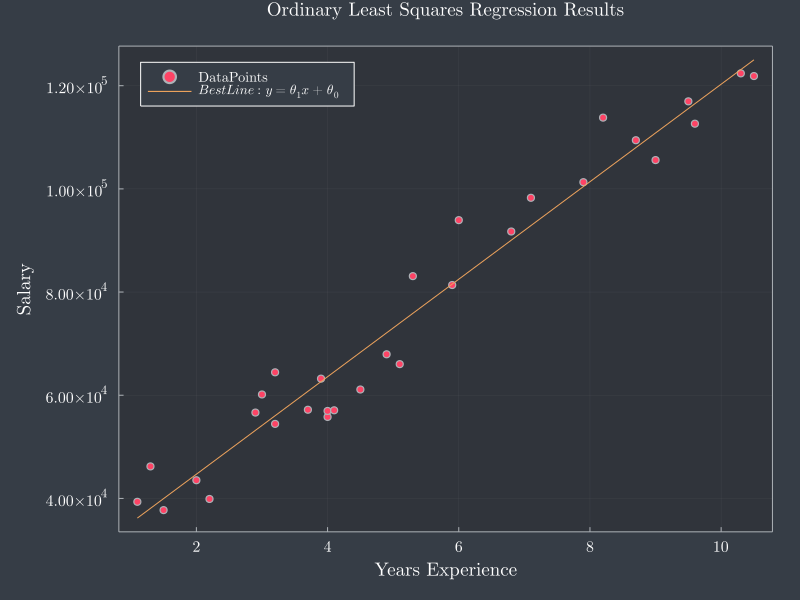

In [79]:
PLT = begin
    scatter(SDF[!,1], SDF[!,2], label = "DataPoints")
    plot!(SDF[!, 1], predict(OLS), label= L"Best Line: y = \theta_1 x + \theta_0")
    # plot!(SDF[!, 1], LY) #The answers are the same
    plot!(legend=:topleft, xlab="Years Experience", ylab="Salary",
        title="Ordinary Least Squares Regression Results",
        size=(800, 600), rightmargin=5mm, bottommargin=5mm, topmargin=5mm, leftmargin=5mm)
end
display(L"\Large \theta_1 = %$(round(coef(OLS)[2], digits = 3)),\quad \theta_0 = %$(round(coef(OLS)[1], digits = 3))")
display(PLT)

## ***Problem 2:***

In [80]:
StartupsData = CSV.read("50_Startups.csv", DataFrame)

,R&D Spend,Administration,Marketing Spend,State,Profit
,Float64,Float64,Float64,String15,Float64
1,1.65349e5,1.36898e5,4.71784e5,New York,1.92262e5
2,1.62598e5,1.51378e5,4.43899e5,California,1.91792e5
3,1.53442e5,1.01146e5,4.07935e5,Florida,1.9105e5
4,1.44372e5,1.18672e5,3.832e5,New York,182902.0
5,1.42107e5,91391.8,3.66168e5,Florida,1.66188e5
6,1.31877e5,99814.7,3.62861e5,New York,1.56991e5
7,1.34615e5,1.47199e5,1.27717e5,California,1.56123e5
8,1.30298e5,1.4553e5,3.23877e5,Florida,1.55753e5
9,1.20543e5,148719.0,3.11613e5,New York,1.52212e5


### ***Part A:***

In [101]:
ExpensesPredicts = Vector{Vector}(undef, 3)
ExpensesCoeffs = Matrix{Float64}(undef, 3, 2)
for i ∈ 1:3
    a, b = UsedFuncs.FitLine(StartupsData[!, i], StartupsData[!, end])
    LY = (a * StartupsData[!, i]) .+ b
    ExpensesCoeffs[i, :] = [a, b]
    ExpensesPredicts[i] = LY
end

L"$\Large \theta_1 = 0.8542913709388095,\quad \theta_0 = 49032.89914125211,\quad R^2 = 0.9465353160804393$"

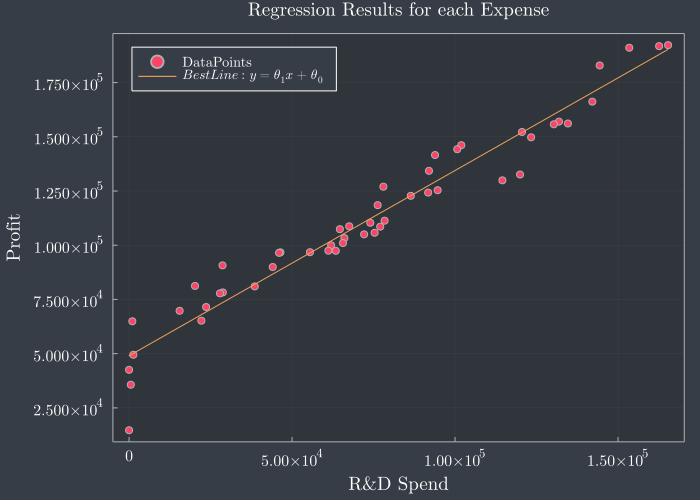

L"$\Large \theta_1 = 0.2887492023552263,\quad \theta_0 = 76974.4713054176,\quad R^2 = 0.04028714077757223$"

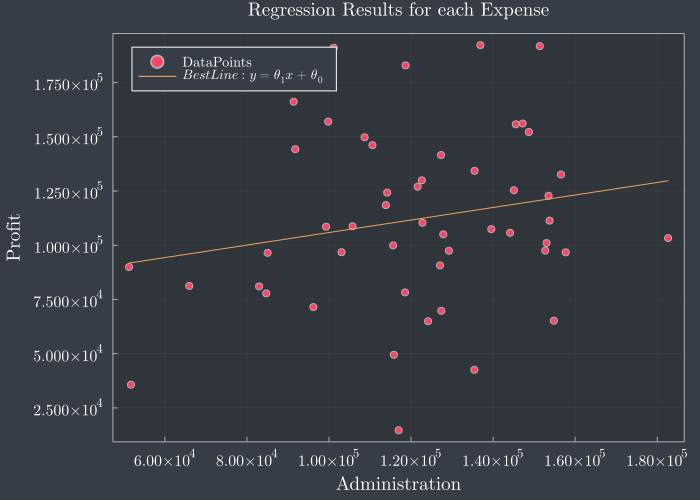

L"$\Large \theta_1 = 0.24645926444976787,\quad \theta_0 = 60003.54881577168,\quad R^2 = 0.5591535746115515$"

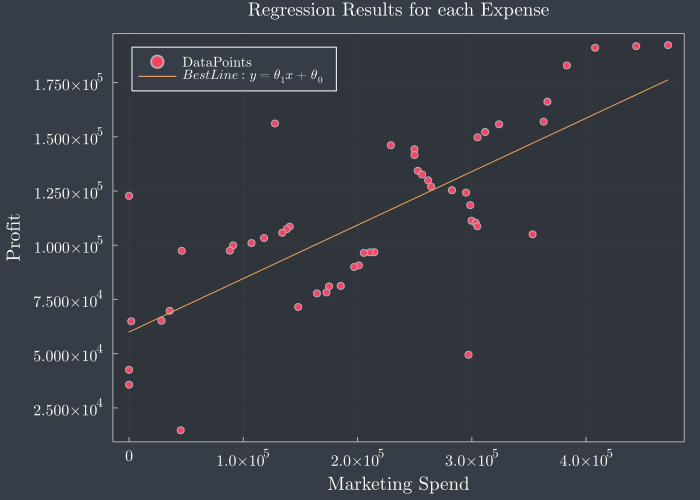

L"$\huge \text{As we can see Profit depends more on R\&D Expenses}$"

In [148]:
for i ∈ 1:3
    PLT = begin
        scatter(StartupsData[!, i], StartupsData[!, end], label = "DataPoints")
        plot!(StartupsData[!, i], ExpensesPredicts[i], label=L"Best Line: y = \theta_1 x + \theta_0")
        # plot!(SDF[!, 1], LY) #The answers are the same
        plot!(legend=:topleft, xlab=names(StartupsData)[i], ylab=names(StartupsData)[end],
            title="Regression Results for each Expense",
            size=(700, 500), rightmargin=2mm, bottommargin=2mm, topmargin=2mm, leftmargin=2mm)
    end
    CoefficientOfDetermination = UsedFuncs.R²(StartupsData[!, end], ExpensesPredicts[i])
    display(L"\Large \theta_1 = %$(ExpensesCoeffs[i, 1]),\quad \theta_0 = %$(ExpensesCoeffs[i, 2]),\quad R^2 = %$CoefficientOfDetermination")
    display(PLT)
end
display(L"\huge \text{As we can see Profit depends more on R\&D Expenses}")

### ***Part B:***

In [170]:
r2(Regress)

0.9507459940683246

2-element Vector{Float64}:
 49032.89914125231
     0.8542913709388064

In [207]:
df = DataFrame()
df.X1 = StartupsData."R&D Spend"
df.X2 = StartupsData."Administration"
df.X3 = StartupsData."Marketing Spend"
df.Y = StartupsData."Profit"

Regress = lm(@formula(Y ~ X1), df)

display(L"\large \text{regress profit on R\&D expense:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)), \quad R^2 = %$(r2(Regress))")

Regress = lm(@formula(Y ~ X1 + X2), df)

display(L"\large \text{regress profit on R\&D and Administration expenses:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)),\quad
    \theta_2 = %$(round(coef(Regress)[3], digits = 3)), \quad R^2 = %$(r2(Regress))")

Regress = lm(@formula(Y ~ X1 + X2 + X3), df)

display(L"\large \text{regress profit on R\&D and Administration and Marketing Spend expenses:}")

display(L"f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2 + x_3 . \theta_3: \quad \quad x_0 = 1,\quad
    \theta_0 = %$(round(coef(Regress)[1], digits = 3)),\quad \theta_1 = %$(round(coef(Regress)[2], digits = 3)),\quad
    \theta_2 = %$(round(coef(Regress)[3], digits = 3)), \quad \theta_3 = %$(round(coef(Regress)[4], digits = 3)), \quad R^2 = %$(r2(Regress))")

L"$\large \text{regress profit on R\&D expense:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1: \quad \quad x_0 = 1,\quad
    \theta_0 = 49032.899,\quad \theta_1 = 0.854, \quad R^2 = 0.9465353160804392$"

L"$\large \text{regress profit on R\&D and Administration expenses:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2: \quad \quad x_0 = 1,\quad
    \theta_0 = 54886.621,\quad \theta_1 = 0.862,\quad
    \theta_2 = -0.053, \quad R^2 = 0.9478129385009173$"

L"$\large \text{regress profit on R\&D and Administration and Marketing Spend expenses:}$"

L"$f_{(X)} = x_0 . \theta_0 + x_1 . \theta_1 + x_2 . \theta_2 + x_3 . \theta_3: \quad \quad x_0 = 1,\quad
    \theta_0 = 50122.193,\quad \theta_1 = 0.806,\quad
    \theta_2 = -0.027, \quad \theta_3 = 0.027, \quad R^2 = 0.9507459940683246$"

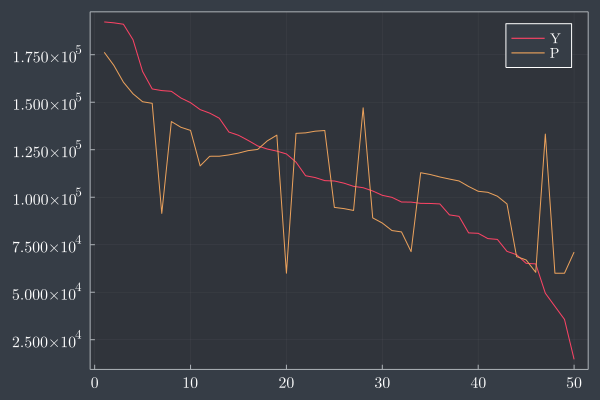

In [181]:
plot(df.Y, label = "Y")
plot!(predict(Regress), label = "P")

In [136]:
include("Mods.jl")

Main.UsedFuncs